# Part 1 Organize Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in csv train data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/train.csv')

display(train_df[0:8])
display(test_df[0:8])

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Extract the labels and pixel values
X_train = train_df.iloc[:5000, 1:].to_numpy()
y_train = train_df.iloc[:5000, 0].to_numpy()
X_test  = test_df.iloc[5000:10000, 1:].to_numpy()
y_test  = test_df.iloc[5000:10000, 0].to_numpy()

display(y_train[0:5])
display(X_train[0:5])
print(len(X_train[0]))

display(y_test[0:5])
display(X_test[0:5])
print(len(X_train[0]))

array([1, 0, 1, 4, 0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

784


array([8, 7, 2, 6, 3])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

784


In [4]:
# Limit the images that are from 0-10 to only 0-7
train_limited = np.where(y_train <= 7)
X_train = X_train[train_limited]
y_train = y_train[train_limited]

test_limited = np.where(y_test <= 7)
X_test = X_test[test_limited]
y_test = y_test[test_limited]

print(y_train.max())
print(y_train.min())

7
0


In [5]:
def reshape_to_2d(matrix, rows, cols, num_observations):
    reshaped_matrix = np.zeros((rows, cols, num_observations))
    for z in range(num_observations):
        for i in range(rows):
            for j in range(cols):
                a = i * cols + j
                reshaped_matrix[i, j, z] = matrix[a, z]
    return reshaped_matrix

def reshape_to_1d(matrix, rows, cols, num_observations):
    reshaped_matrix = np.zeros((rows * cols, num_observations))
    for z in range(num_observations):
        for i in range(rows):
            for j in range(cols):
                a = i * cols + j
                reshaped_matrix[a, z] = matrix[i, j, z]
    return reshaped_matrix


In [6]:
# Create reshaped square matrix for the input data for each number image
train_matrix = reshape_to_2d(X_train.T,28,28,len(y_train))
test_matrix  = reshape_to_2d(X_test.T,28,28,len(y_test))

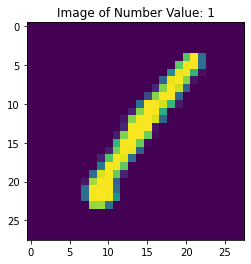

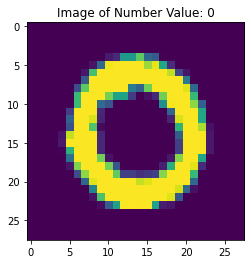

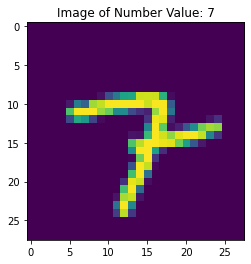

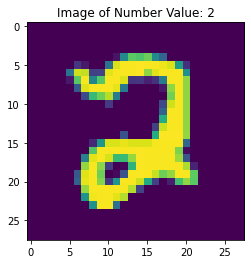

In [7]:
# Print the reshaped square matrix as an image
for i in range(2):
    a = train_matrix[:,:,i]
    plt.imshow(a)
    plt.title(f"Image of Number Value: {y_train[i]}")
    plt.show()
    
for i in range(2):
    a = test_matrix[:,:,i]
    plt.imshow(a)
    plt.title(f"Image of Number Value: {y_test[i]}")
    plt.show()

# Part 2 Preprocessing

In [8]:
# cast the current 28x28 images to 10x10 images
# Normalize pixel values to max of the pixel values

import scipy.ndimage

resized_train_matrix = np.zeros((10,10,len(y_train)))
resized_test_matrix  = np.zeros((10,10,len(y_test)))

for z in range(len(y_train)):
    resized_train_matrix[:,:,z] = scipy.ndimage.zoom(train_matrix[:,:,z], (10/28, 10/28), order=1)/X_train.max()
for z in range(len(y_test)):
    resized_test_matrix[:,:,z] = scipy.ndimage.zoom(test_matrix[:,:,z], (10/28, 10/28), order=1)/X_test.max()
    
print(resized_train_matrix.shape)
print(resized_test_matrix.shape)

(10, 10, 4045)
(10, 10, 4010)


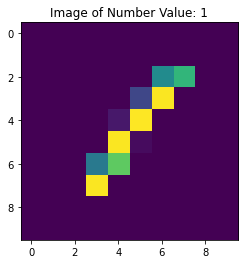

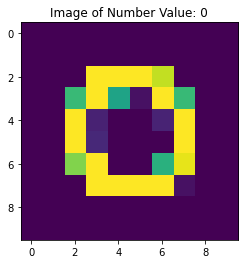

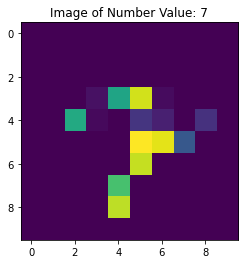

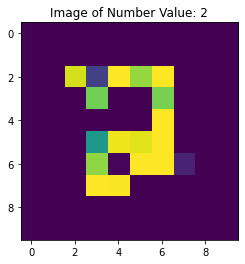

In [9]:
# Print the reshaped square matrix as an image
for i in range(2):
    a = resized_train_matrix[:,:,i]
    plt.imshow(a)
    plt.title(f"Image of Number Value: {y_train[i]}")
    plt.show()
    
# Print the reshaped square matrix as an image
for i in range(2):
    a = resized_test_matrix[:,:,i]
    plt.imshow(a)
    plt.title(f"Image of Number Value: {y_test[i]}")
    plt.show()

In [10]:
# 10x10 option
# xx000333666
# xx000333777
# xx000444777
# xx111444777
# xx111444888
# xx111555888
# xx222555888
# xx222555999
# xx222666999
# xx333666999

In [11]:
# # Resize Train and Test matrices to a 10x18 to include labels in the images
train_matrix_labels = np.zeros((10, 19, len(y_train)))
test_matrix_labels  = np.zeros((10, 19, len(y_test)))

# Loop through each 10x10 matrix in train_matrix
for i in range(resized_train_matrix.shape[2]):
    # Extract the current 10x10 matrix
    original_matrix = resized_train_matrix[:, :, i]

    # Create a 10x9 matrix filled with zeros
    additional_columns = np.zeros((10, 9))

    # Concatenate the original matrix with the additional columns along the second axis (columns)
    new_matrix = np.hstack((original_matrix, additional_columns))

    # Store the new_matrix in the new_train_matrix
    train_matrix_labels[:, :, i] = new_matrix
    
# Loop through each 10x10 matrix in test_matrix
for i in range(resized_test_matrix.shape[2]):
    # Extract the current 10x10 matrix
    original_matrix = resized_test_matrix[:, :, i]

    # Create a 10x9 matrix filled with zeros
    additional_columns = np.zeros((10, 9))

    # Concatenate the original matrix with the additional columns along the second axis (columns)
    new_matrix = np.hstack((original_matrix, additional_columns))

    # Store the new_matrix in the new_train_matrix
    test_matrix_labels[:, :, i] = new_matrix
    
print(train_matrix_labels.shape)

(10, 19, 4045)


In [12]:
# 10x10 options
for i in range(len(y_train)):
    if y_train[i] == 0:
        train_matrix_labels[0:3,10:13,i] = 1
    if y_train[i] == 1:
        train_matrix_labels[3:6,10:13,i] = 1
    if y_train[i] == 2:
        train_matrix_labels[6:9,10:13,i] = 1
    if y_train[i] == 3:
        train_matrix_labels[9,10:13,i] = 1
        train_matrix_labels[0:2,13:16,i] = 1
    if y_train[i] == 4:
        train_matrix_labels[2:5,13:16,i] = 1
    if y_train[i] == 5:
        train_matrix_labels[5:8,13:16,i] = 1
    if y_train[i] == 6:
        train_matrix_labels[8:10,13:16,i] = 1
        train_matrix_labels[0:1,16:19,i] = 1
    if y_train[i] == 7:
        train_matrix_labels[1:4,16:19,i] = 1
    if y_train[i] == 8:
        train_matrix_labels[4:7,16:19,i] = 1
    if y_train[i] == 9:
        train_matrix_labels[7:10,16:19,i] = 1

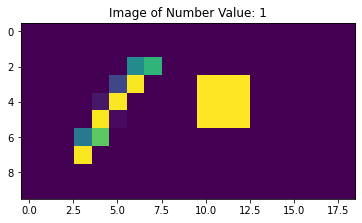

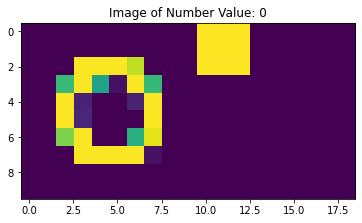

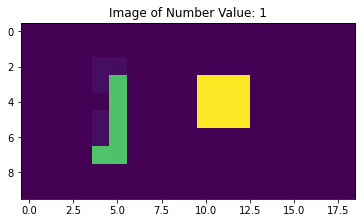

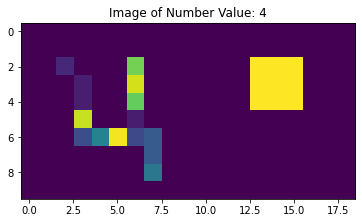

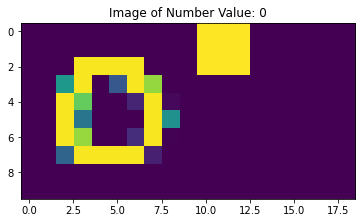

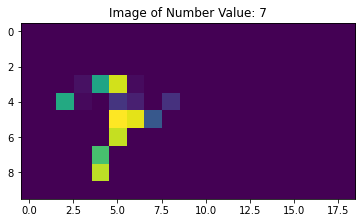

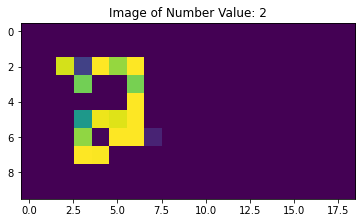

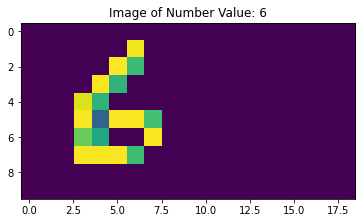

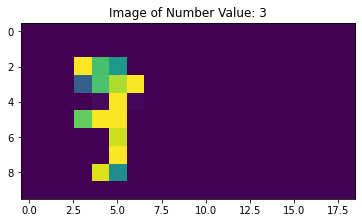

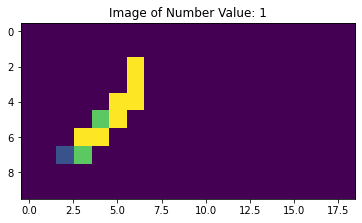

In [13]:
# Print the reshaped square matrix as an image
for i in range(5):
    a = train_matrix_labels[:,:,i]
    plt.imshow(a)
    plt.title(f"Image of Number Value: {y_train[i]}")
    plt.show()
    
# Print the reshaped square matrix as an image
for i in range(5):
    a = test_matrix_labels[:,:,i]
    plt.imshow(a)
    plt.title(f"Image of Number Value: {y_test[i]}")
    plt.show()

# Part 3 Restrictive Boltzmann Machine

In [14]:
# Flatten images from rectangle 28x34 images to 1 dimensional 952 length array
flattened_train_images = reshape_to_1d(train_matrix_labels,train_matrix_labels.shape[0],train_matrix_labels.shape[1],train_matrix_labels.shape[2])
flattened_test_images  = reshape_to_1d(test_matrix_labels,test_matrix_labels.shape[0],test_matrix_labels.shape[1],test_matrix_labels.shape[2])

# Re-Referencing Pre-Processed Data
print(train_matrix_labels.shape)
print(flattened_train_images.shape)
print(y_train.shape)
print(train_matrix_labels.shape)
print(flattened_test_images.shape)
print(y_test.shape)

(10, 19, 4045)
(190, 4045)
(4045,)
(10, 19, 4045)
(190, 4010)
(4010,)


In [15]:
# Initialize nodes for the RBM
# Number of visible nodes
num_visible_nodes = flattened_train_images.shape[0]

# Number of hidden nodes
num_hidden_nodes = 175

# Initialize the weight matrix (n_visible x n_hidden)
np.random.seed(46)
weights = np.random.rand(num_visible_nodes, num_hidden_nodes) * 0.01

# Initialize the visible and hidden biases
visible_biases = np.zeros((num_visible_nodes,1))
hidden_biases = np.zeros((1,num_hidden_nodes))

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sampling(probabilities):
#     np.random.seed(46)
    prob_comparison_matrix = np.random.rand(*probabilities.shape)
    output_binary_matrix = (prob_comparison_matrix < probabilities).astype(np.int32)
    return output_binary_matrix

def RBM_Training(train_data,weights,visible_biases,hidden_biases,learning_rate,n_batches,batch_size,epochs):
    for epoch in range(n_epochs):
        for batch_idx in range(n_batches):
            start = batch_idx * batch_size
            end = (batch_idx + 1) * batch_size

            visible_initial = train_data[:, start:end]
            visible_initial_binary = sampling(visible_initial)
            hidden_prob = sigmoid(np.dot(visible_initial_binary.T, weights) + hidden_biases)
            hidden_binary = sampling(hidden_prob)

            visible_iter_prob = sigmoid(np.dot(weights, hidden_binary.T) + visible_biases)
            visible_iter_binary = sampling(visible_iter_prob)
            hidden_iter_prob = sigmoid(np.dot(visible_iter_binary.T, weights) + hidden_biases)
            hidden_iter_binary = sampling(hidden_iter_prob)

            delta_w = learning_rate * (np.dot(hidden_binary.T, visible_initial_binary.T) - \
                                       np.dot(hidden_iter_binary.T, visible_iter_binary.T)) / batch_size
            weights += delta_w.T
            visible_biases += learning_rate * np.mean(visible_initial_binary - visible_iter_binary, axis=1, keepdims=True)
            hidden_biases += learning_rate * np.mean(hidden_binary - hidden_iter_binary, axis=0, keepdims=True)
        
    return weights,visible_biases,hidden_biases

def reconstruct_image(test_data, w, vb, hb):
    h_prob = sigmoid(np.dot(test_data.T, w) + hb)
    h = sampling(h_prob)
    v_prob = sigmoid(np.dot(h, w.T) + vb.T)
    v_reconstructed = sampling(v_prob)
    return v_reconstructed.T

In [17]:
# 10x10
def accuracy_parsar(test_image_reconstruction,y_test):
    numbers = np.unique(y_test)
    y_pred = [0]*test_image_reconstruction.shape[2]
    for i in range(test_image_reconstruction.shape[2]):
        count_max = 0
        for j in numbers:
            if j == 0:
                count = np.sum(test_image_reconstruction[0:3,10:13,i])
                if count >= count_max:
                    y_pred[i] = j
                    count_max = count
            if j == 1:
                count = np.sum(test_image_reconstruction[3:6,10:13,i])
                if count >= count_max:
                    y_pred[i] = j
                    count_max = count
            if j == 2:
                count = np.sum(test_image_reconstruction[6:9,10:13,i])
                if count >= count_max:
                    y_pred[i] = j
                    count_max = count
            if j == 3:
                count = np.sum(test_image_reconstruction[9,10:13,i])+np.sum(test_image_reconstruction[0:2,13:16,i])
                if count >= count_max:
                    y_pred[i] = j
                    count_max = count
            if j == 4:
                count = np.sum(test_image_reconstruction[2:5,13:16,i])
                if count >= count_max:
                    y_pred[i] = j
                    count_max = count
            if j == 5:
                count = np.sum(test_image_reconstruction[5:8,13:16,i])
                if count >= count_max:
                    y_pred[i] = j
                    count_max = count
            if j == 6:
                count = np.sum(test_image_reconstruction[8:10,13:16,i])+np.sum(test_image_reconstruction[0:1,16:19,i])
                if count >= count_max:
                    y_pred[i] = j
                    count_max = count
            if j == 7:
                count = np.sum(test_image_reconstruction[1:4,16:19,i])
                if count >= count_max:
                    y_pred[i] = j
                    count_max = count
            if j == 8:
                count = np.sum(test_image_reconstruction[4:7,16:19,i])
                if count >= count_max:
                    y_pred[i] = j
                    count_max = count
            if j == 9:
                count = np.sum(test_image_reconstruction[7:9,16:19,i])
                if count >= count_max:
                    y_pred[i] = j
                    count_max = count
            if count_max == 0:
                y_pred[i] = -1
                    
    correct_predictions = np.sum(y_pred == y_test)
    total_predictions = len(y_pred)
    accuracy_percentage = (correct_predictions / total_predictions) * 100

    print(f'Accuracy: {accuracy_percentage}%')
    return y_pred, accuracy_percentage

def run_iteration(train_images,test_images,weights,vis_bias,hid_bias,n_epochs,batch_size,learning_rate):
    n_samples = train_images.shape[1]
    n_batches = int(n_samples / batch_size)
    weights_copy = weights.copy()
    visible_biases_copy = visible_biases.copy()
    hidden_biases_copy = hidden_biases.copy()
    
    weights_copy,visible_biases_copy,hidden_biases_copy = RBM_Training\
        (train_images,weights_copy,visible_biases_copy,hidden_biases_copy,learning_rate,n_batches,batch_size,n_epochs)

    reconstructed_images = reconstruct_image(test_images, weights_copy, visible_biases_copy, hidden_biases_copy)

    reconstructed_images_2d = reshape_to_2d(reconstructed_images,10,19,test_images.shape[1])
    
    y_pred, accuracy_percentage = accuracy_parsar(reconstructed_images_2d,y_test)
    
    return reconstructed_images_2d,y_pred,accuracy_percentage

Current Learning Rate is: 0.1
Accuracy: 6.658354114713216%
Current Learning Rate is: 0.2
Accuracy: 6.907730673316709%
Current Learning Rate is: 0.30000000000000004
Accuracy: 9.750623441396508%
Current Learning Rate is: 0.4
Accuracy: 9.750623441396508%
Current Learning Rate is: 0.5
Accuracy: 10.02493765586035%
Current Learning Rate is: 0.6
Accuracy: 10.249376558603492%
Current Learning Rate is: 0.7000000000000001
Accuracy: 14.364089775561098%
Current Learning Rate is: 0.8
Accuracy: 16.159600997506235%
Current Learning Rate is: 0.9
Accuracy: 19.301745635910226%
Current Learning Rate is: 1.0
Accuracy: 21.4214463840399%
Current Learning Rate is: 1.1
Accuracy: 24.33915211970075%
Current Learning Rate is: 1.2000000000000002
Accuracy: 21.97007481296758%
Current Learning Rate is: 1.3000000000000003
Accuracy: 17.057356608478802%
Current Learning Rate is: 1.4000000000000001
Accuracy: 23.167082294264336%
Current Learning Rate is: 1.5000000000000002
Accuracy: 21.596009975062344%
Current Learning R

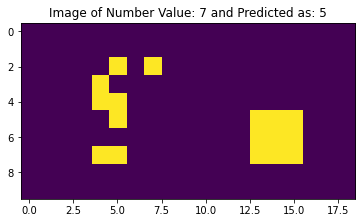

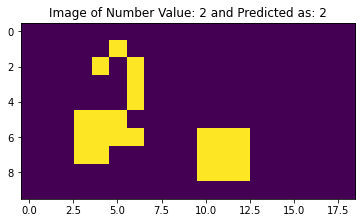

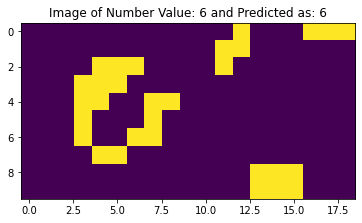

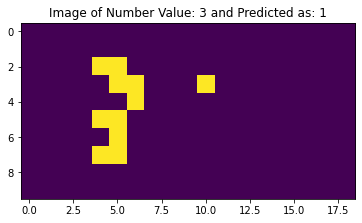

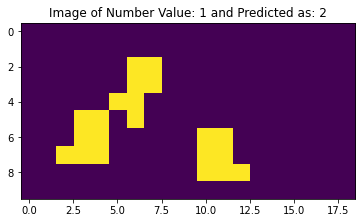

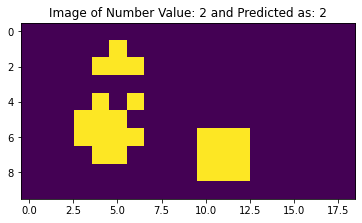

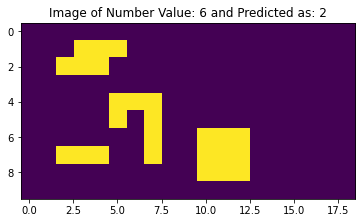

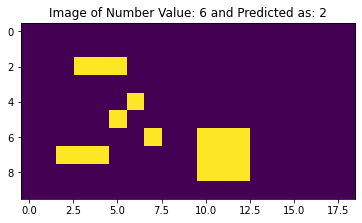

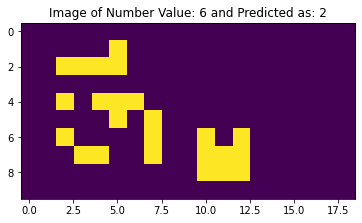

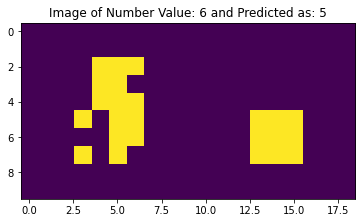

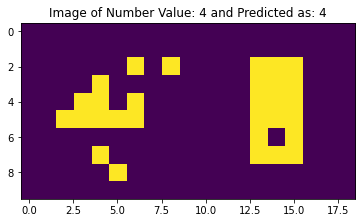

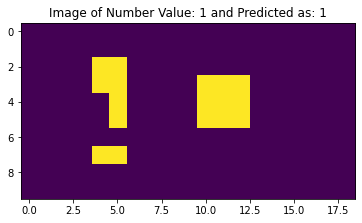

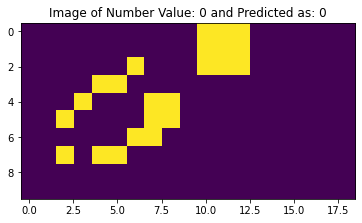

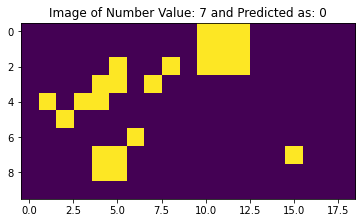

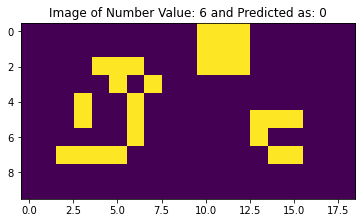

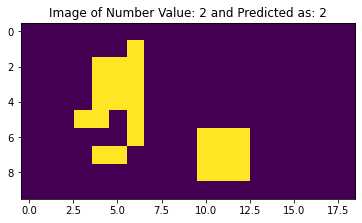

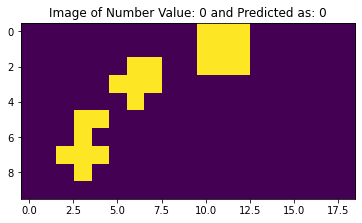

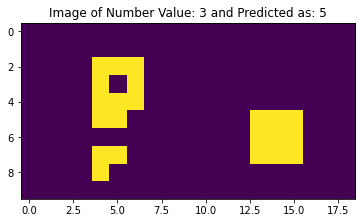

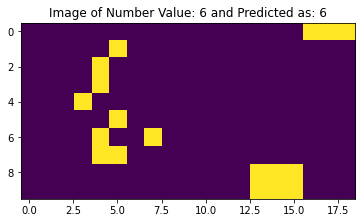

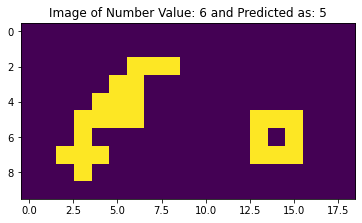

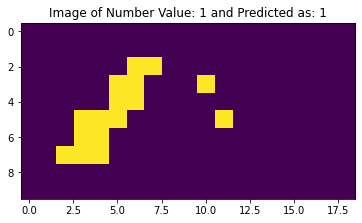

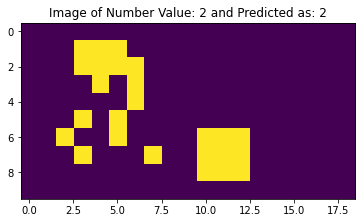

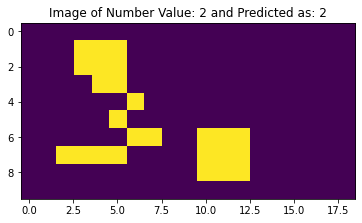

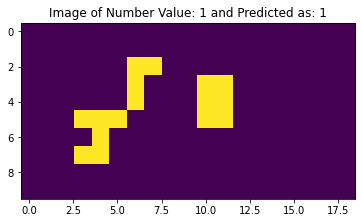

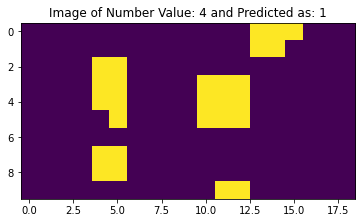

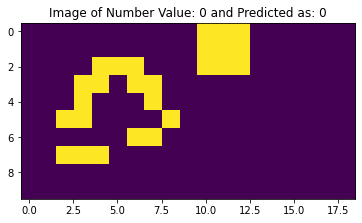

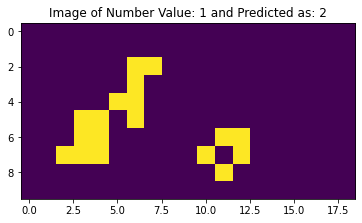

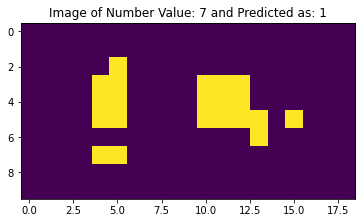

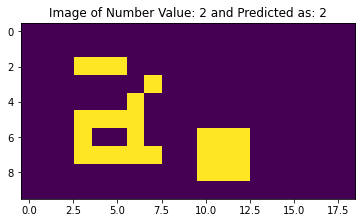

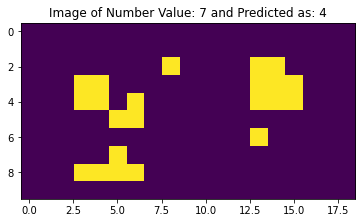

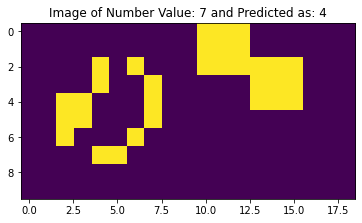

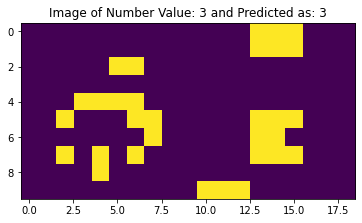

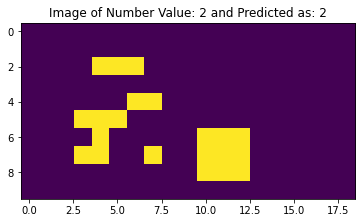

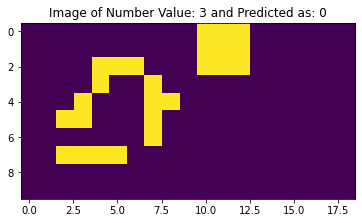

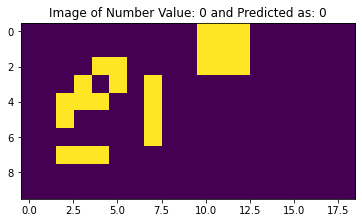

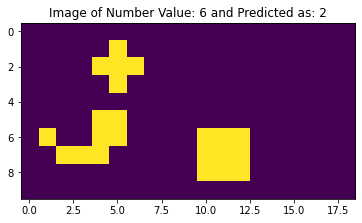

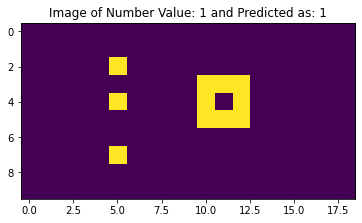

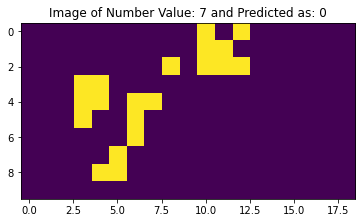

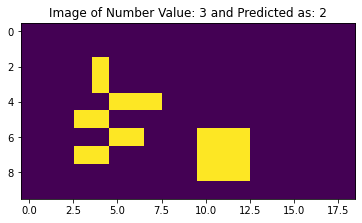

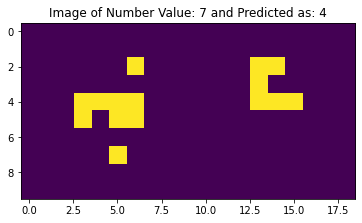

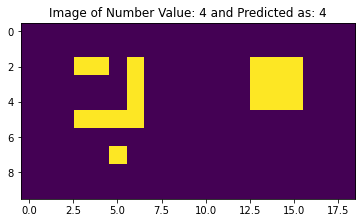

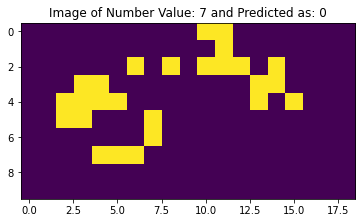

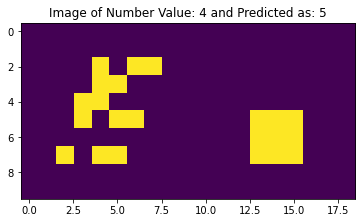

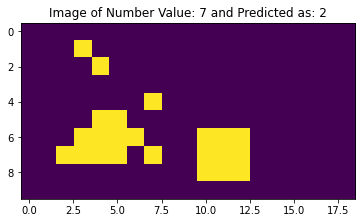

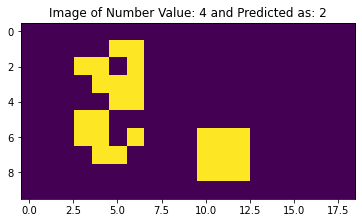

In [19]:
# # Set hyperparameters
n_epochs = 10
batch_size = 10
learning_rates = np.linspace(0.1,10,100)

max_accuracy = 0
most_accurate_reconstruction = None
most_accuracy_y_pred = None
best_learning_rate = 0
best_n_epochs = 0

for learning_rate in learning_rates:
    print(f"Current Learning Rate is: {learning_rate}")
    reconstructed_images_2d,y_pred,accuracy = run_iteration(flattened_train_images,flattened_test_images,weights,\
                  visible_biases,hidden_biases,n_epochs,batch_size,learning_rate)
    if accuracy > max_accuracy:
        max_accuracy                 = accuracy
        most_accurate_reconstruction = reconstructed_images_2d
        most_accuracy_y_pred         = y_pred
        best_learning_rate           = learning_rate

epoch_iterator = [10,20,30,40,50,60,70,80,90,100]
max_accuracy = 0
for n_epochs in epoch_iterator:
    print(f"Current epoch_number is: {n_epochs}")
    reconstructed_images_2d,y_pred,accuracy = run_iteration(flattened_train_images,flattened_test_images,weights,\
                  visible_biases,hidden_biases,n_epochs,batch_size,best_learning_rate)
    if accuracy > max_accuracy:
        max_accuracy                 = accuracy
        most_accurate_reconstruction = reconstructed_images_2d
        most_accuracy_y_pred         = y_pred
        best_n_epochs                = n_epochs
        
print(f"Maximum accuracy was {max_accuracy} with learning rate was {best_learning_rate} and epoch_n: {best_n_epochs}")
for i in range(45):
    plt.imshow(most_accurate_reconstruction[:,:,i])
    plt.title(f"Image of Number Value: {y_test[i]} and Predicted as: {most_accuracy_y_pred[i]}")
    plt.show()